# Introduction to Keras and TensorFlow

## 3.1 What's TensorFlow?

## 3.2 What's Keras?

## 3.3 Keras and TensorFlow: A brief history

## 3.4 Setting up a deep learning workspace

### 3.4.1 Jupyter notebooks: The preferred way to run deep learning experiments

### 3.4.2 Using Colaboratory

## 3.5 First steps with TensorFlow

### 3.5.1 Constant tensors and variables

**All-ones or all-zeros tensors**

In [2]:
import tensorflow as tf
x = tf.ones(shape=(3, 4))
print(x)

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


2022-01-10 21:48:37.362143: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 21:48:37.362816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 21:48:37.368335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 21:48:37.369018: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 21:48:37.369632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [3]:
x = tf.zeros(shape=(2, 3))
print(x)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


**Random tensors**

In [4]:
x = tf.random.normal(shape=(2, 3), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.27425596 -1.273747    0.54543275]
 [ 1.8793272  -0.60762876  0.00994622]], shape=(2, 3), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(2, 3), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.26977086 0.20440221 0.7249942 ]
 [0.6917683  0.92917323 0.96948993]], shape=(2, 3), dtype=float32)


Numpy arrays와 TensorFlow tensors 사이의 가장 큰 차이는 numpy array는 값 할당이 가능하지만 tensorflow tensor는 값 할당을 할 수 없음

**Numpy arrays are asignable**

In [6]:
import numpy as np
x = np.ones(shape=(2, 3))
print(x)
x[0, 0] = 0.
print(x)

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 1. 1.]
 [1. 1. 1.]]


**TensorFlow tensors are not asignable**

In [8]:
x = tf.ones(shape=(2, 3))
print(x)
x[0, 0] = 0

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

**Creating a TensorFlow variable**

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(2, 3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.28722033,  0.4093482 , -0.0409047 ],
       [-1.0932306 , -1.4768028 ,  0.40405387]], dtype=float32)>


variale의 상태는 assign 메소드를 사용해서 변경할 수 있음

In [10]:
v.assign(tf.ones(shape=(2, 3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


**Assigning a value to a subset of a TensorFlow variable**

In [11]:
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[3., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


```assign_add(), assign_sub()``` 는 각각 ```+=, -=```와 동일한 연산 수행

In [12]:
v.assign_add(tf.ones(shape=(2, 3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[4., 2., 2.],
       [2., 2., 2.]], dtype=float32)>


### 3.5.2 Tensor operations: Doing math in TensorFlow

Numpy와 마찬가지로 TensorFlow도 다양한 수식을 표현하기 위한 다양한 텐서 연산자를 제공

**A few basic math operations**

In [13]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

TensorFlow도 Numpy와 마찬가지로 실행 시점에 바로 결과를 확인할 수 있음(eager execution이라고 함)

## 3.5.3 A second look at the GradientTape API

**Using the `GradientTape`**

In [15]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


- `gradients = tape.gradient(loss, weights)` 모델의 loss에 대한 기울기를 구하는 가장 일반적인 방법
- trainable variables만 기본적으로 추적 함. 상수에 대해서는 `tape.watch()` 호출해서 추적이 가능하도록 해줘야 함

**Using `GradientTape` with constant tensor inputs**

In [17]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [20]:
time = tf.Variable(0.3)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time **2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(2.9400005, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## 3.5.4 An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [23]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
print(negative_samples.shape)
print(positive_samples.shape)

(1000, 2)
(1000, 2)


In [24]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

(2000, 2)


In [26]:
labels = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")
))
print(labels.shape)

(2000, 1)


**Plotting the two point classes**

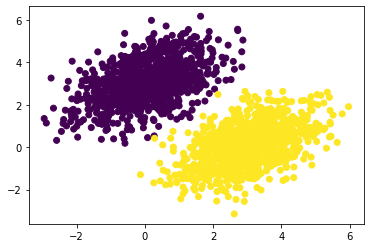

In [28]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels[:, 0])
plt.show()

**Creating the linear classifier variables**

In [30]:

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))

**The forward pass function**

In [31]:
def model(inputs):
    # prediction = W * input + b
    return tf.matmul(inputs, W) + b